<H1> Les jeux de données pour le projet </H1>

Dans ce notebook nous présentons les jeux de données utilisés pour le projet. Nous proposons également des fonctions pour permettre de pouvoir facilement les données.   

Il n'y a donc plus qu'à chercher les meilleurs modèles et à répondre aux questions de l'énoncé du projet.   

Bon courage !

ps : il y a trois jeux de données et ils sont très différents donc attention vous aurez peut être 3 modèles différents.

## Installation



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [1]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...

# sous Colab il faut déjà intégrer ces deux librairies

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=7b15ad9d942bda7ac2c48461e76d9d77339e5b69c06a9020bd5c6ce1ac5c8046
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are ins

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob

In [3]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()


def plot_curves(histories):
    plt.figure(1,figsize=(16,6))
    plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
    for i in range(len(histories)):
    	# plot loss
    	plt.subplot(121)
    	plt.title('Cross Entropy Loss')
    	plt.plot(histories[i].history['loss'], color='blue', label='train')
    	plt.plot(histories[i].history['val_loss'], color='red', label='test')
    	plt.ylabel('loss')
    	plt.xlabel('epoch')
    	plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    	# plot accuracy
    	plt.subplot(122)
    	plt.title('Classification Accuracy')
    	plt.ylabel('accuracy')
    	plt.xlabel('epoch')
    	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    	plt.plot(histories[i].history['val_accuracy'], color='red',
                 label='test')
    	plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
#from google.colab import drive
#drive.mount('/content/gdrive')

Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive :

In [ ]:
#import sys
#my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
#sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
#%cd $my_local_drive

#%pwd

####Les jeux de données


Récupération des jeux de données :      

In [4]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

--2023-11-24 09:25:01--  https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605545 (7.3M) [application/zip]
Saving to: ‘Tiger-Fox-Elephant.zip’

Tiger-Fox-Elephant. 100%[===================>]   7.25M  6.64MB/s    in 1.1s    

2023-11-24 09:25:03 (6.64 MB/s) - ‘Tiger-Fox-Elephant.zip’ saved [7605545/7605545]



In [5]:
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project")

#Fonction


Il y a trois jeux de données différents : des tigres, des éléphants et des renards. Pour chacun d'entre eux il y a un ensemble d'images positive et un ensemble d'images négatives. Par exemple dans le répertoire *tiger* il n'y a que des images de tigre et dans le répertoire *Tiger_negative_class* il n'y a que des images d'animaux qui ne correspondent pas à des tigres.   

Le code ci-dessous permet de visualiser quelques images contenues dans le répertoire *tiger*.

Définition de constante globale      


In [8]:
# constantes globales

IMG_SIZE=124  #Taille de l'image
COLUMNS = 25 # Nombre d'images à afficher

Pour les tigres :

Visualisation des données par clustering



In [ ]:
%mkdir Resultats/PCA
%mkdir Resultats/UMAP
%mkdir Resultats/TSNE

mkdir: cannot create directory ‘Resultats/PCA’: No such file or directory
mkdir: cannot create directory ‘Resultats/UMAP’: No such file or directory
mkdir: cannot create directory ‘Resultats/TSNE’: No such file or directory


In [9]:
import PIL
import sys
import os
import shutil
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import cv2
import string
import zipfile
import random
import umap
import umap.plot
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from skimage import io, color, img_as_ubyte
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning:

The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



Pour chaque animal, il existe un répertoire contenant des images positives et un répertoire contenant des images négatives. Nous créons un jeu de données aléatoire pour obtenir X et y

In [10]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      return X,y

def create(my_classes):
  mypath='Data_Project/Tiger-Fox-Elephant/'
  X,y = create_X_y(mypath,my_classes)
  X=X.astype('float')
  X=X/255.0
  return X,y

In [15]:
#UMA
def plot_2d_fashion_mnist_scatter(X, y, labels):

    fig, plot = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.prism()

    for i in range(len(labels)):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"{labels[i]}")


    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()


#UMAP


Fox

In [18]:
from umap import UMAP
my_classe_fox=['fox','Fox_negative_class']
X_fox, y_fox = create(my_classe_fox)
X_reshape_fox = X_fox.reshape((-1,IMG_SIZE*IMG_SIZE*3))
y_plot_fox = y_fox
nb_images_fox = X_fox.shape[0]
fox_umap_reducer = UMAP()
fox_umap_embedding = fox_umap_reducer.fit_transform(X_reshape_fox)
fox_umap_embedding.shape

(200, 2)

Elephant

In [20]:
from umap import UMAP
my_classe_elephant=['elephant','Elephant_negative_class']
X_elephant, y_elephant = create(my_classe_elephant)
X_reshape_elephant = X_elephant.reshape((-1,IMG_SIZE*IMG_SIZE*3))
y_plot_elephant = y_elephant
nb_images_elephant = X_elephant.shape[0]
elephant_umap_reducer = UMAP()
elephant_umap_embedding = fox_umap_reducer.fit_transform(X_reshape_elephant)
elephant_umap_embedding.shape

(200, 2)

Tiger

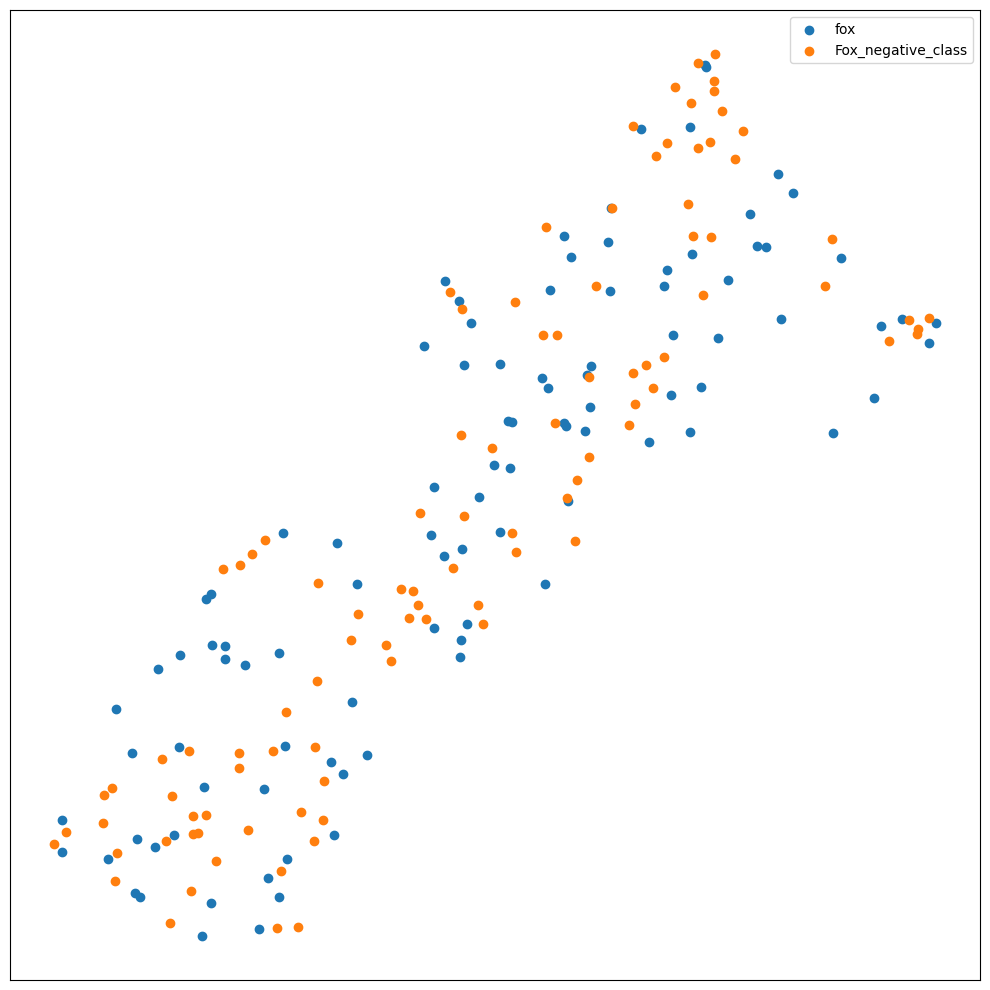

In [19]:
#fox
plot_2d_fashion_mnist_scatter(fox_umap_embedding, y.astype(int),my_classe_fox)


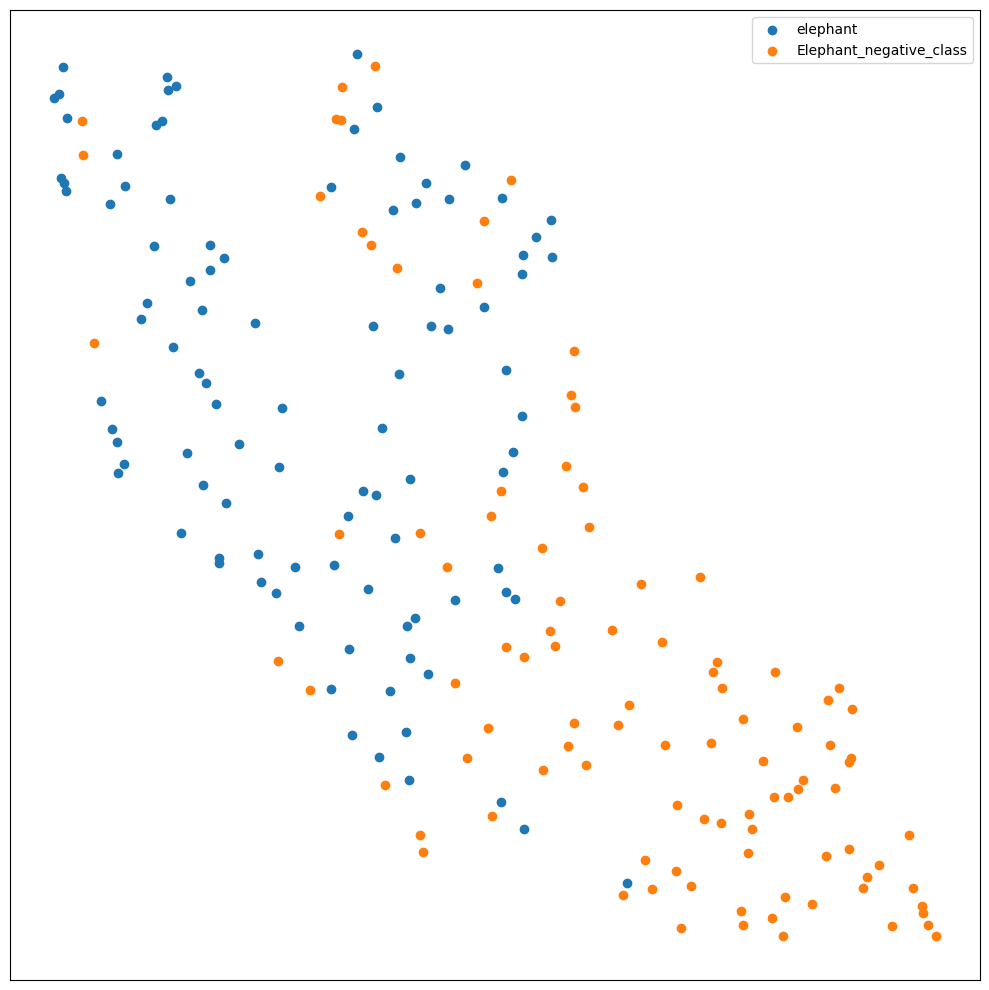

In [21]:
#elephant
plot_2d_fashion_mnist_scatter(elephant_umap_embedding, y_elephant.astype(int),my_classe_elephant)


# TSNE

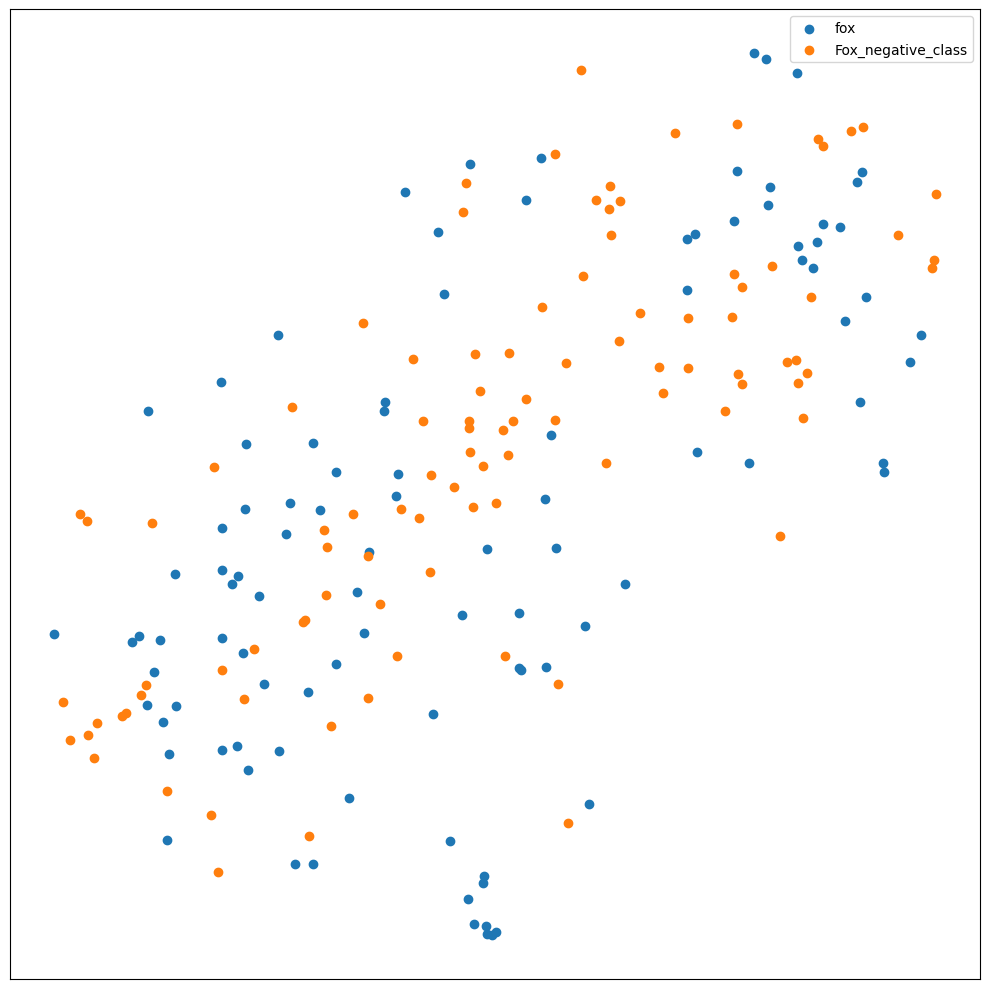

In [24]:
#fox

fox_tsne_embedding = TSNE(n_components=2, perplexity=40).fit_transform(X_reshape_fox)
plot_2d_fashion_mnist_scatter(fox_tsne_embedding, y_fox.astype(int),my_classe_fox)

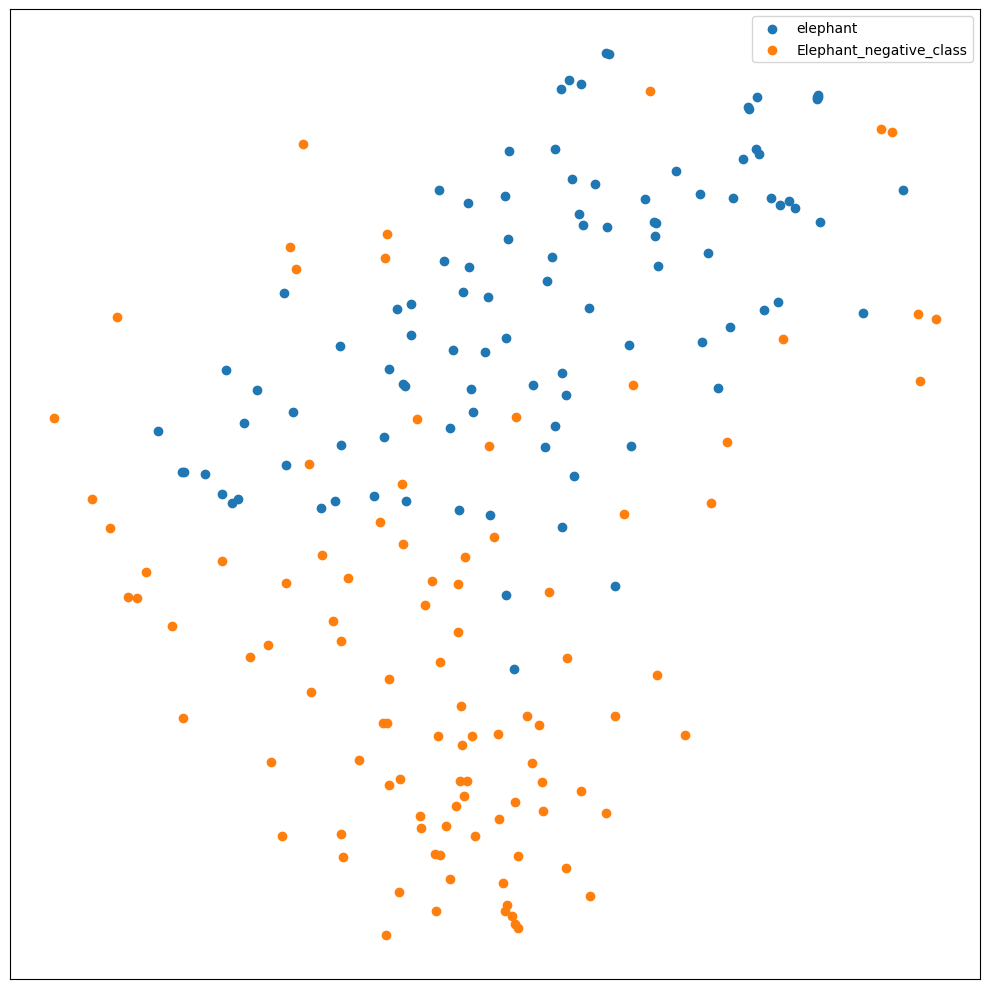

In [22]:
#elephant
elephant_tsne_embedding = TSNE(n_components=2, perplexity=40).fit_transform(X_reshape_elephant)
plot_2d_fashion_mnist_scatter(elephant_tsne_embedding, y_elephant.astype(int),my_classe_elephant)